In [1]:
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate, LeakyReLU,BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import h5py
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import scipy.io

F:\anaconda_intiall352\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f = h5py.File('Input_Patches_3Dsyn.mat', 'r')
dataNoisy= f.get('dn_patch')

In [3]:
ind = np.random.permutation(len(dataNoisy))
dataNoisy = np.array(dataNoisy)
dataNoisy = dataNoisy[ind]

In [4]:
INPUT_SIZE1 = dataNoisy.shape[0]
INPUT_SIZE2 = dataNoisy.shape[1]
# ENCODING_SIZE = 16

input_img = Input(shape=(INPUT_SIZE2,))

encoded1 = Dense(128)(input_img)
encoded1 = BatchNormalization()(encoded1)
encoded1 = LeakyReLU(0.2)(encoded1)
encoded1 = Dense(128)(encoded1)
encoded1 = BatchNormalization()(encoded1)
encoded1 = LeakyReLU(0.2)(encoded1)

skip1 = Dense(128)(encoded1)
skip1 = BatchNormalization()(skip1)
skip1 = LeakyReLU(0.2)(skip1)

encoded2 = Dense(64)(encoded1)
encoded2 = BatchNormalization()(encoded2)
encoded2 = LeakyReLU(0.2)(encoded2)
encoded2 = Dense(64)(encoded2)
encoded2 = BatchNormalization()(encoded2)
encoded2 = LeakyReLU(0.2)(encoded2)

skip2 = Dense(64)(encoded2)
skip2 = BatchNormalization()(skip2)
skip2 = LeakyReLU(0.2)(skip2)

encoded3 = Dense(32)(encoded2)
encoded3 = BatchNormalization()(encoded3)
encoded3 = LeakyReLU(0.2)(encoded3)
encoded3 = Dense(32)(encoded3)
encoded3 = BatchNormalization()(encoded3)
encoded3 = LeakyReLU(0.2)(encoded3)

skip3 = Dense(32)(encoded3)
skip3 = BatchNormalization()(skip3)
skip3 = LeakyReLU(0.2)(skip3)

encoded4 = Dense(16)(encoded3)
encoded4 = BatchNormalization()(encoded4)
encoded4 = LeakyReLU(0.2)(encoded4)
encoded4 = Dense(16)(encoded4)
encoded4 = BatchNormalization()(encoded4)
encoded4 = LeakyReLU(0.2)(encoded4)

skip4 = Dense(16)(encoded4)
skip4 = BatchNormalization()(skip4)
skip4 = LeakyReLU(0.2)(skip4)

encoded5 = Dense(8)(encoded4)
encoded5 = BatchNormalization()(encoded5)
encoded5 = LeakyReLU(0.2)(encoded5)
encoded5 = Dense(8)(encoded5)
encoded5 = BatchNormalization()(encoded5)
encoded5 = LeakyReLU(0.2)(encoded5)

skip5 = Dense(8)(encoded5)
skip5 = BatchNormalization()(skip5)
skip5 = LeakyReLU(0.2)(skip5)

encoded6 = Dense(4)(encoded5)
encoded6 = BatchNormalization()(encoded6)
encoded6 = LeakyReLU(0.2)(encoded6)
encoded6 = Dense(4)(encoded6)
encoded6 = BatchNormalization()(encoded6)
encoded6 = LeakyReLU(0.2)(encoded6)

skip6 = Dense(4)(encoded6)
skip6 = BatchNormalization()(skip6)
skip6 = LeakyReLU(0.2)(skip6)
# Decoder

decoded6 = Dense(4)(skip6)
decoded6 = BatchNormalization()(decoded6)
decoded6 = LeakyReLU(0.2)(decoded6)
decoded6 = Dense(4)(decoded6)
decoded6 = BatchNormalization()(decoded6)
decoded6 = LeakyReLU(0.2)(decoded6)
decoded6 = concatenate([decoded6, skip6])


decoded5 = Dense(8)(decoded6)
decoded5 = BatchNormalization()(decoded5)
decoded5 = LeakyReLU(0.2)(decoded5)
decoded5 = Dense(8)(decoded5)
decoded5 = BatchNormalization()(decoded5)
decoded5 = LeakyReLU(0.2)(decoded5)
decoded5 = concatenate([decoded5, skip5])

decoded4 = Dense(16)(decoded5)
decoded4 = BatchNormalization()(decoded4)
decoded4 = LeakyReLU(0.2)(decoded4)
decoded4 = Dense(16)(decoded4)
decoded4 = BatchNormalization()(decoded4)
decoded4 = LeakyReLU(0.2)(decoded4)
decoded4 = concatenate([decoded4, skip4])

decoded3 = Dense(32)(decoded4)
decoded3 = BatchNormalization()(decoded3)
decoded3 = LeakyReLU(0.2)(decoded3)
decoded3 = Dense(32)(decoded3)
decoded3 = BatchNormalization()(decoded3)
decoded3 = LeakyReLU(0.2)(decoded3)
decoded3 = concatenate([decoded3, skip3])

decoded2 = Dense(64)(decoded3)
decoded2 = BatchNormalization()(decoded2)
decoded2 = LeakyReLU(0.2)(decoded2)
decoded2 = Dense(64)(decoded2)
decoded2 = BatchNormalization()(decoded2)
decoded2 = LeakyReLU(0.2)(decoded2)
decoded2 = concatenate([decoded2, skip2])

decoded1 = Dense(128)(decoded2)
decoded1 = BatchNormalization()(decoded1)
decoded1 = LeakyReLU(0.2)(decoded1)
decoded1 = Dense(128)(decoded1)
decoded1 = BatchNormalization()(decoded1)
decoded1 = LeakyReLU(0.2)(decoded1)
decoded1 = concatenate([decoded1, skip1])



decoded = Dense(INPUT_SIZE2, activation='linear')(decoded1)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3375)         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          432128      input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128)          512         dense[0][0]                      
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128)          0           batch_normalization[0][0]        
__________________________________________________________________________________________________
dense_1 (D

In [5]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_3dsyn_patch.h5', monitor='val_loss', mode='min', save_best_only=True)

batch = 128

history = autoencoder.fit(dataNoisy, dataNoisy, verbose=2,epochs=100, batch_size=batch, shuffle="batch", callbacks=[es, mc],
                          validation_split=0.2)

Train on 29030 samples, validate on 7258 samples
Epoch 1/100
 - 23s - loss: 0.0549 - val_loss: 0.0481
Epoch 2/100
 - 12s - loss: 0.0465 - val_loss: 0.0456
Epoch 3/100
 - 12s - loss: 0.0449 - val_loss: 0.0444
Epoch 4/100
 - 12s - loss: 0.0441 - val_loss: 0.0438
Epoch 5/100
 - 12s - loss: 0.0435 - val_loss: 0.0435
Epoch 6/100
 - 12s - loss: 0.0431 - val_loss: 0.0430
Epoch 7/100
 - 12s - loss: 0.0428 - val_loss: 0.0435
Epoch 8/100
 - 12s - loss: 0.0426 - val_loss: 0.0425
Epoch 9/100
 - 12s - loss: 0.0425 - val_loss: 0.0431
Epoch 10/100
 - 12s - loss: 0.0423 - val_loss: 0.0424
Epoch 11/100
 - 12s - loss: 0.0421 - val_loss: 0.0424
Epoch 12/100
 - 12s - loss: 0.0420 - val_loss: 0.0423
Epoch 13/100
 - 12s - loss: 0.0419 - val_loss: 0.0431
Epoch 14/100
 - 12s - loss: 0.0418 - val_loss: 0.0425
Epoch 15/100
 - 12s - loss: 0.0419 - val_loss: 0.0422
Epoch 16/100
 - 12s - loss: 0.0416 - val_loss: 0.0423
Epoch 17/100
 - 12s - loss: 0.0415 - val_loss: 0.0419
Epoch 18/100
 - 12s - loss: 0.0415 - val_l

In [6]:
model = load_model('best_model_3dsyn_patch.h5')

#f = h5py.File('./Input_Patches.mat', 'r')
f = h5py.File('Input_Patches_3Dsyn.mat', 'r')
dataNoise= f.get('dn_patch')

out = model.predict(dataNoise)
scipy.io.savemat('Output_Patches_3Dsyn.mat', mdict={'out': out})

In [15]:
def patch3d_inv(X, mode, n1, n2, n3, l1=4, l2=4, l3=4, s1=2, s2=2, s3=2):
    """
    patch3d_inv: insert patches into the 3D data

    by Yangkang Chen
    March, 2020

    Input
      D: input image
      mode: patching mode
      n1: first dimension size
      n1: second dimension size
      n3: third dimension size
      l1: first patch size
      l2: second patch size
      l3: third patch size
      s1: first shifting size
      s2: second shifting size
      s3: third shifting size

    Output
      X: patches

    Modified on Dec 12, 2018 (the edge issue, arbitrary size for the matrix)
                  Dec 31, 2018 (tmp1=mod(n1,l1) -> tmp1=mod(n1-l1,s1))
                Marich, 31, 2020, 2D->3D

    Example
    sgk_denoise() in pyseisdl/denoise.py
    """

    if mode == 1:  # possible for other patching options

        tmp1 = np.mod(n1 - l1, s1);
        tmp2 = np.mod(n2 - l2, s2);
        tmp3 = np.mod(n3 - l3, s3);
        if tmp1 != 0 and tmp2 != 0 and tmp3 != 0:
            A = np.zeros([n1 + s1 - tmp1, n2 + s2 - tmp2, n3 + s3 - tmp3]);
            mask = np.zeros([n1 + s1 - tmp1, n2 + s2 - tmp2, n3 + s3 - tmp3]);

        if tmp1 != 0 and tmp2 != 0 and tmp3 == 0:
            A = np.zeros([n1 + s1 - tmp1, n2 + s2 - tmp2, n3]);
            mask = np.zeros([n1 + s1 - tmp1, n2 + s2 - tmp2, n3]);

        if tmp1 != 0 and tmp2 == 0 and tmp3 == 0:
            A = np.zeros([n1 + s1 - tmp1, n2, n3]);
            mask = np.zeros([n1 + s1 - tmp1, n2, n3]);

        if tmp1 == 0 and tmp2 != 0 and tmp3 == 0:
            A = np.zeros([n1, n2 + s2 - tmp2, n3]);
            mask = np.zeros([n1, n2 + s2 - tmp2, n3]);

        if tmp1 == 0 and tmp2 == 0 and tmp3 != 0:
            A = np.zeros([n1, n2, n3 + s3 - tmp3]);
            mask = np.zeros([n1, n2, n3 + s3 - tmp3]);

        if tmp1 == 0 and tmp2 == 0 and tmp3 == 0:
            A = np.zeros([n1, n2, n3]);
            mask = np.zeros([n1, n2, n3]);

        [N1, N2, N3] = A.shape;
        id = -1;
        for i1 in range(0, N1 - l1 + 1, s1):
            for i2 in range(0, N2 - l2 + 1, s2):
                for i3 in range(0, N3 - l3 + 1, s3):
                    id = id + 1;
                    A[i1:i1 + l1, i2:i2 + l2, i3:i3 + l3] = A[i1:i1 + l1, i2:i2 + l2, i3:i3 + l3] + np.reshape(X[:, id],
                                                                                                               [l1, l2,
                                                                                                                l3],
                                                                                                               order='F');
                    mask[i1:i1 + l1, i2:i2 + l2, i3:i3 + l3] = mask[i1:i1 + l1, i2:i2 + l2, i3:i3 + l3] + np.ones(
                        [l1, l2, l3]);
        A = A / mask;

        A = A[0:n1, 0:n2, 0:n3];
    else:
        # not written yet
        pass;
    return A


In [16]:
w1=15
w2=15
w3=15
z1=1
z2=1
z3=1

model = load_model('best_model_3dsyn_patch.h5')

datan = scipy.io.loadmat(r'.\Datasets\3Dsyn_data.mat')
dataNoisyy = datan['DataNoisy']

n1,n2,n3 = np.shape(dataNoisyy)

In [18]:

f = h5py.File('Input_Patches_3Dsyn.mat', 'r')
dataNoisy= f.get('dn_patch')

out = model.predict(dataNoisy)
print(out.shape)

predicted = np.transpose(out)
predicted = patch3d_inv(predicted,1,n1,n2,n3,w1,w2,w3,z1,z2,z3)
print(predicted.shape)

(36288, 3375)
(126, 32, 32)


In [21]:
import pyortho as lo 

datan = scipy.io.loadmat(r'.\Datasets\3Dsyn_data.mat')
DataCleann = datan['DataClean']

print('SNR of initial denoising is %g'%lo.snr(DataCleann,dataNoisyy,2));
print('SNR of denoised data using DDUL is %g'%lo.snr(DataCleann,predicted,2));

SNR of initial denoising is -2.16955
SNR of denoised data using DDUL is 14.0692


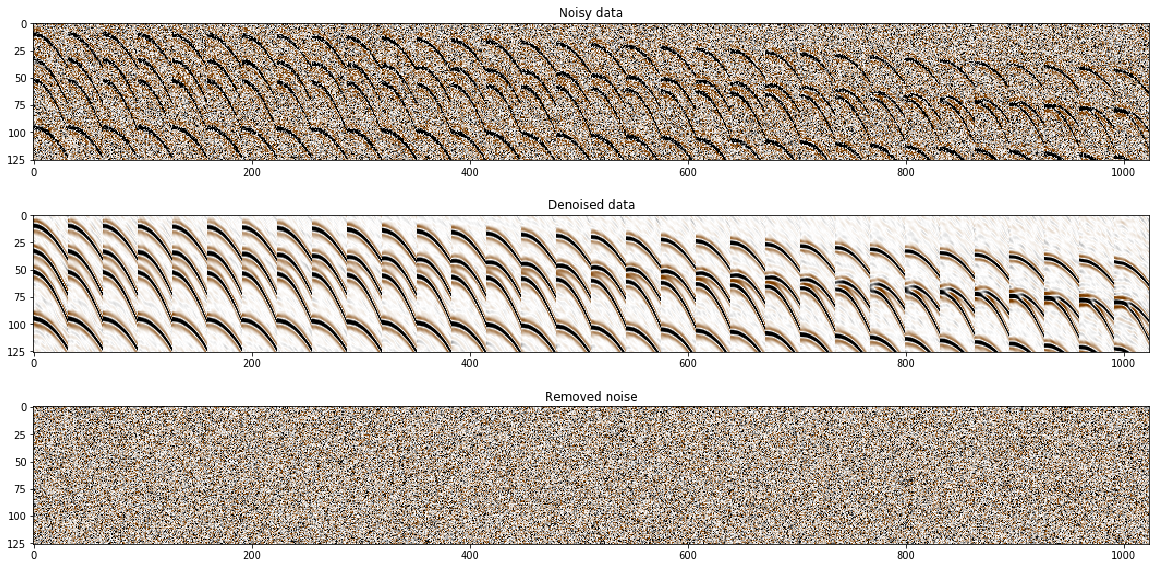

In [30]:
def cseis():
    from matplotlib.colors import ListedColormap
    import numpy as np
    seis=np.concatenate(
(np.concatenate((0.5*np.ones([1,40]),np.expand_dims(np.linspace(0.5,1,88),axis=1).transpose(),np.expand_dims(np.linspace(1,0,88),axis=1).transpose(),np.zeros([1,40])),axis=1).transpose(),
np.concatenate((0.25*np.ones([1,40]),np.expand_dims(np.linspace(0.25,1,88),axis=1).transpose(),np.expand_dims(np.linspace(1,0,88),axis=1).transpose(),np.zeros([1,40])),axis=1).transpose(),
np.concatenate((np.zeros([1,40]),np.expand_dims(np.linspace(0,1,88),axis=1).transpose(),np.expand_dims(np.linspace(1,0,88),axis=1).transpose(),np.zeros([1,40])),axis=1).transpose()),axis=1)
    return ListedColormap(seis)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
fig.add_subplot(3, 1, 1)
plt.imshow(dataNoisyy.transpose(0,2,1).reshape(n1,n2*n3),cmap=cseis(),clim=(-0.5, 0.5))
plt.title('Noisy data');
fig.add_subplot(3, 1, 2)
plt.imshow(predicted.transpose(0,2,1).reshape(n1,n2*n3),cmap=cseis(),clim=(-0.5, 0.5))
plt.title('Denoised data');
fig.add_subplot(3, 1, 3)
plt.imshow((dataNoisyy-predicted).transpose(0,2,1).reshape(n1,n2*n3),cmap=cseis(),clim=(-0.5, 0.5))
plt.title('Removed noise');
plt.show()

In [31]:
d1=predicted;
noi1=dataNoisyy-d1;

rect=[10,10,10];
eps=0;
niter=20;
verb=1;

## calculate local similarity
simi1=lo.localsimi(d1,noi1,[5,5,5],niter,eps,verb);


iteration: 1, res: 1 !
iteration: 2, res: 0.997235 !
iteration: 3, res: 0.99532 !
iteration: 4, res: 0.993584 !
iteration: 5, res: 0.991948 !
iteration: 6, res: 0.990243 !
iteration: 7, res: 0.988355 !
iteration: 8, res: 0.987051 !
iteration: 9, res: 0.985931 !
iteration: 10, res: 0.985101 !
iteration: 11, res: 0.984565 !
iteration: 12, res: 0.984281 !
iteration: 13, res: 0.98415 !
iteration: 14, res: 0.984122 !
iteration: 15, res: 0.984124 !
iteration: 16, res: 0.984147 !
iteration: 17, res: 0.984172 !
iteration: 18, res: 0.984189 !
iteration: 19, res: 0.9842 !
iteration: 20, res: 0.984202 !
iteration: 1, res: 1 !
iteration: 2, res: 0.993219 !
iteration: 3, res: 0.989782 !
iteration: 4, res: 0.988128 !
iteration: 5, res: 0.987458 !
iteration: 6, res: 0.987211 !
iteration: 7, res: 0.987125 !
iteration: 8, res: 0.987093 !
iteration: 9, res: 0.987081 !
iteration: 10, res: 0.987077 !
iteration: 11, res: 0.987076 !
iteration: 12, res: 0.987076 !


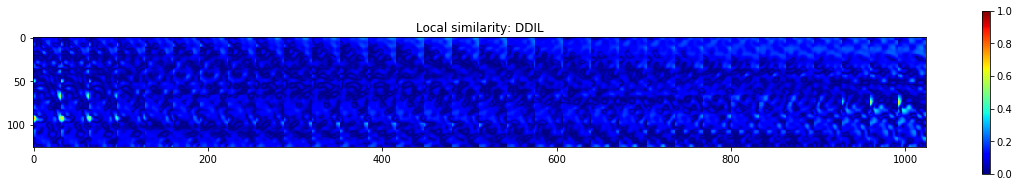

In [36]:
fig = plt.figure(figsize=(20, 3))
plt.imshow(simi1.reshape(n1,n2*n3,order='F'),cmap='jet',clim=(0,1))
plt.title('Local similarity: DDIL');
plt.colorbar()